In [ ]:
# %load Logistic (1).py
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split # train and test 
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report

# loading claimants data 

claimants = pd.read_csv("E:\\Classes\\Trainer Tools\\Final\\04 Logistic Regression\\Data Sets\\claimants.csv")

claimants.head(10)
# Droping first column 
claimants.drop(["CASENUM"],inplace=True,axis = 1)

#cat_cols = ["ATTORNEY","CLMSEX","SEATBELT","CLMINSUR"]
#cont_cols = ["CLMAGE","LOSS"]

# Getting the barplot for the categorical columns 

sb.countplot(x="ATTORNEY",data=claimants,palette="hls")
pd.crosstab(claimants.ATTORNEY,claimants.CLMINSUR).plot(kind="bar")

sb.countplot(x="CLMSEX",data=claimants,palette="hls")
pd.crosstab(claimants.CLMSEX,claimants.CLMINSUR).plot(kind="bar")
sb.countplot(x="SEATBELT",data=claimants,palette="hls")
pd.crosstab(claimants.SEATBELT,claimants.CLMINSUR).plot(kind="bar")

sb.countplot(x="CLMINSUR",data=claimants,palette="hls")

# Data Distribution - Boxplot of continuous variables wrt to each category of categorical columns

sb.boxplot(x="ATTORNEY",y="CLMAGE",data=claimants,palette="hls")
sb.boxplot(x="ATTORNEY",y="LOSS",data=claimants,palette="hls")
sb.boxplot(x="CLMSEX",y="CLMAGE",data=claimants,palette="hls")
sb.boxplot(x="CLMSEX",y="LOSS",data=claimants,palette="hls")
sb.boxplot(x="SEATBELT",y="CLMAGE",data=claimants,palette="hls")
sb.boxplot(x="SEATBELT",y="LOSS",data=claimants,palette="hls")
sb.boxplot(x="CLMINSUR",y="CLMAGE",data=claimants,palette="hls")
sb.boxplot(x="CLMINSUR",y="LOSS",data=claimants,palette="hls")

# To get the count of null values in the data 

claimants.isnull().sum()


claimants.shape # 1340 6 => Before dropping null values

# To drop null values ( dropping rows)

claimants.dropna().shape # 1096 6 => After dropping null values

# Fill nan values with mode of the categorical column 

claimants["CLMSEX"].fillna(1,inplace=True) # claimants.CLMSEX.mode() = 1

claimants["CLMINSUR"].fillna(1,inplace=True) # claimants.CLMINSUR.mode() = 1

claimants["SEATBELT"].fillna(0,inplace=True) # claimants.SEATBELT.mode() = 0

claimants["CLMSEX"].fillna(1,inplace=True) # claimants.CLMSEX.mode() = 1


claimants.CLMAGE.fillna(28.4144,inplace=True) # claimants.CLMAGE.mean() = 28.4
# Model building 
from sklearn.linear_model import LogisticRegression

claimants.shape
X = claimants.iloc[:,[1,2,3,4,5]]
Y = claimants.iloc[:,0]
classifier = LogisticRegression()
classifier.fit(X,Y)

classifier.coef_ # coefficients of features 
classifier.predict_proba (X) # Probability values 

y_pred = classifier.predict(X)
claimants["y_pred"] = y_pred
y_prob = pd.DataFrame(classifier.predict_proba(X.iloc[:,:]))
new_df = pd.concat([claimants,y_prob],axis=1)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)
type(y_pred)
accuracy = sum(Y==y_pred)/claimants.shape[0]
pd.crosstab(y_pred,Y)

##########################################################################
# Loading data which contains categorical data to demonstrate how to 
# create dummy columns 

salary = pd.read_csv("E:\\bokey\\Excelr Data\\Python Codes\\all_py\\Logistic Regression\\sal.csv")

# creating dummy columns for the categorical columns 
salary.columns
sal_dummies = pd.get_dummies(salary[["workclass","occupation","education","maritalstatus","relationship","race","sex","native"]])
# Dropping the columns for which we have created dummies
salary.drop(["workclass","education","maritalstatus","occupation","relationship","race","sex","native"],inplace=True,axis = 1)

# adding the columns to the salary data frame 

salary = pd.concat([salary,sal_dummies],axis=1)

salary["cat"] = 0


salary.loc[salary.Salary==" <=50K","cat"] = 1
salary.Salary.value_counts()
salary.cat.value_counts()
salary.drop(["Salary"],axis=1,inplace=True)

##########################################################################

In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # train and test
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report

In [10]:
claimants = pd.read_csv("claimants.csv")
claimants

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
5,97,0,1.0,1.0,0.0,35.0,0.309
6,10,0,0.0,1.0,0.0,9.0,3.538
7,36,0,1.0,1.0,0.0,34.0,4.881
8,51,1,1.0,1.0,0.0,60.0,0.874
9,55,1,0.0,1.0,0.0,NaN,0.350


In [11]:
claimants.head(10)

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
5,97,0,1.0,1.0,0.0,35.0,0.309
6,10,0,0.0,1.0,0.0,9.0,3.538
7,36,0,1.0,1.0,0.0,34.0,4.881
8,51,1,1.0,1.0,0.0,60.0,0.874
9,55,1,0.0,1.0,0.0,NaN,0.350


In [12]:
claimants.drop(["CASENUM"],inplace=True,axis = 1)

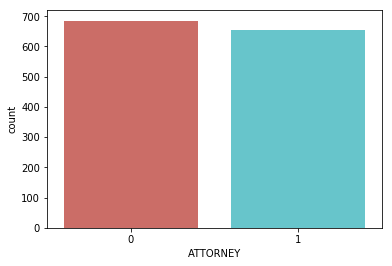

In [13]:
sb.countplot(x="ATTORNEY",data=claimants,palette="hls")

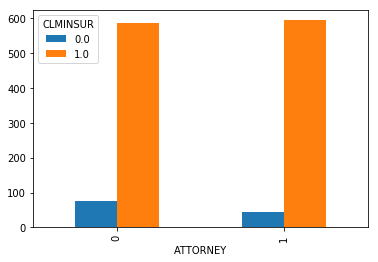

In [14]:
pd.crosstab(claimants.ATTORNEY,claimants.CLMINSUR).plot(kind="bar")

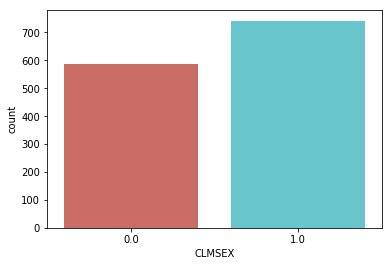

In [15]:
sb.countplot(x="CLMSEX",data=claimants,palette="hls")

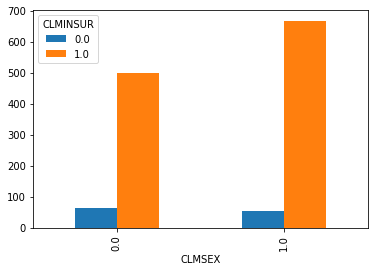

In [16]:
pd.crosstab(claimants.CLMSEX,claimants.CLMINSUR).plot(kind="bar")

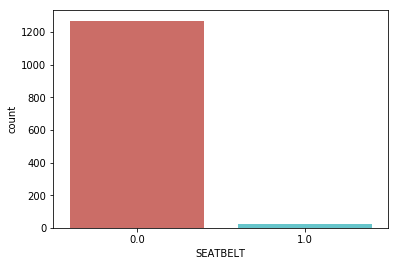

In [17]:
sb.countplot(x="SEATBELT",data=claimants,palette="hls")

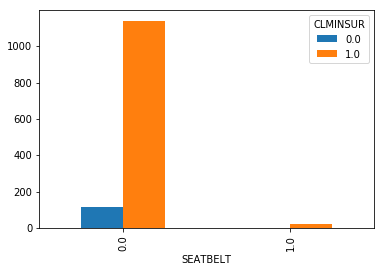

In [19]:
pd.crosstab(claimants.SEATBELT,claimants.CLMINSUR).plot(kind="bar")

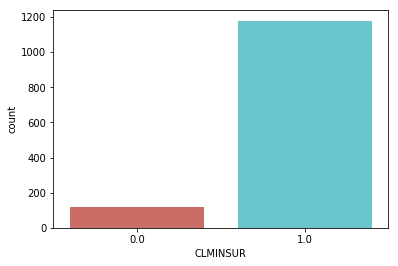

In [20]:
sb.countplot(x="CLMINSUR",data=claimants,palette="hls")


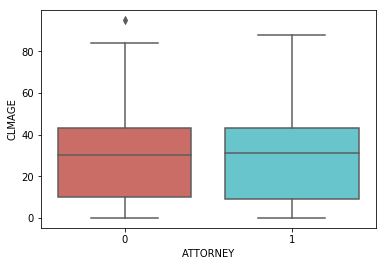

In [21]:
sb.boxplot(x="ATTORNEY",y="CLMAGE",data=claimants,palette="hls")

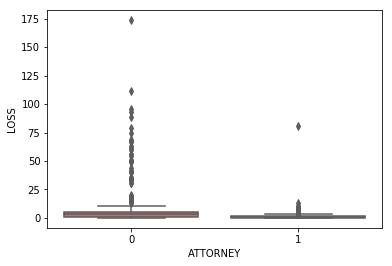

In [22]:
sb.boxplot(x="ATTORNEY",y="LOSS",data=claimants,palette="hls")

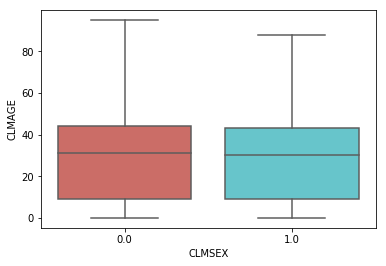

In [23]:
sb.boxplot(x="CLMSEX",y="CLMAGE",data=claimants,palette="hls")

In [24]:

claimants.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [25]:
claimants.shape

(1340, 6)

In [29]:
claimants.dropna().shape

(1096, 6)

In [61]:
claimants.CLMSEX.mode()
claimants.CLMINSUR.mode()

0    1.0
dtype: float64

In [31]:
claimants["CLMSEX"].fillna(1,inplace=True)

In [32]:
claimants["CLMINSUR"].fillna(1,inplace=True)

In [34]:
claimants.SEATBELT.mode()

0    0.0
dtype: float64

In [35]:
claimants["SEATBELT"].fillna(0,inplace=True)

In [36]:
claimants.CLMAGE.mean()

28.414422241529106

In [37]:
claimants.CLMAGE.fillna(28.4144,inplace=True) 

In [38]:
claimants.isnull().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [41]:
X = claimants.iloc[:,[1,2,3,4,5]]
Y = claimants.iloc[:,0]
X
Y

0       0
1       1
2       1
3       0
4       1
5       0
6       0
7       0
8       1
9       1
10      0
11      0
12      1
13      0
14      1
15      1
16      1
17      0
18      1
19      0
20      0
21      1
22      0
23      0
24      1
25      1
26      1
27      0
28      1
29      0
       ..
1310    0
1311    0
1312    0
1313    1
1314    1
1315    0
1316    1
1317    0
1318    1
1319    1
1320    1
1321    0
1322    1
1323    0
1324    0
1325    0
1326    0
1327    0
1328    0
1329    1
1330    1
1331    0
1332    1
1333    1
1334    1
1335    1
1336    0
1337    1
1338    0
1339    1
Name: ATTORNEY, Length: 1340, dtype: int64

In [42]:
classifier = LogisticRegression()

In [43]:
classifier.fit(X,Y)

C:\Users\varun\Anacond\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
classifier.coef_

array([[ 0.31620084,  0.50087144, -0.52878248,  0.0065758 , -0.32259809]])

In [45]:
classifier.predict_proba (X)

array([[9.99974219e-01, 2.57808240e-05],
       [4.94202228e-01, 5.05797772e-01],
       [4.24737576e-01, 5.75262424e-01],
       ...,
       [2.85436331e-01, 7.14563669e-01],
       [6.85685529e-01, 3.14314471e-01],
       [3.38841622e-01, 6.61158378e-01]])

In [47]:
y_pred = classifier.predict(X)
y_pred

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [49]:
claimants["y_pred"] = y_pred
claimants

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,y_pred
0,0,0.0,1.0,0.0,50.0000,34.940,0
1,1,1.0,0.0,0.0,18.0000,0.891,1
2,1,0.0,1.0,0.0,5.0000,0.330,1
3,0,0.0,1.0,1.0,31.0000,0.037,1
4,1,0.0,1.0,0.0,30.0000,0.038,1
5,0,1.0,1.0,0.0,35.0000,0.309,1
6,0,0.0,1.0,0.0,9.0000,3.538,0
7,0,1.0,1.0,0.0,34.0000,4.881,0
8,1,1.0,1.0,0.0,60.0000,0.874,1
9,1,0.0,1.0,0.0,28.4144,0.350,1


In [51]:
y_prob = pd.DataFrame(classifier.predict_proba(X.iloc[:,:]))
y_prob

,0,1
0,0.999974,0.000026
1,0.494202,0.505798
2,0.424738,0.575262
3,0.489985,0.510015
4,0.363097,0.636903
5,0.304999,0.695001
6,0.669348,0.330652
7,0.658786,0.341214
8,0.308801,0.691199
9,0.389154,0.610846


In [52]:
new_df = pd.concat([claimants,y_prob],axis=1)

In [53]:
new_df

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,y_pred,0,1
0,0,0.0,1.0,0.0,50.0000,34.940,0,0.999974,0.000026
1,1,1.0,0.0,0.0,18.0000,0.891,1,0.494202,0.505798
2,1,0.0,1.0,0.0,5.0000,0.330,1,0.424738,0.575262
3,0,0.0,1.0,1.0,31.0000,0.037,1,0.489985,0.510015
4,1,0.0,1.0,0.0,30.0000,0.038,1,0.363097,0.636903
5,0,1.0,1.0,0.0,35.0000,0.309,1,0.304999,0.695001
6,0,0.0,1.0,0.0,9.0000,3.538,0,0.669348,0.330652
7,0,1.0,1.0,0.0,34.0000,4.881,0,0.658786,0.341214
8,1,1.0,1.0,0.0,60.0000,0.874,1,0.308801,0.691199
9,1,0.0,1.0,0.0,28.4144,0.350,1,0.389154,0.610846


In [56]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[435 250]
 [147 508]]


In [57]:
type(y_pred)

numpy.ndarray

In [59]:
accuracy = sum(Y==y_pred)/claimants.shape[0]
accuracy

0.7037313432835821

In [60]:
pd.crosstab(y_pred,Y)


ATTORNEY,0,1
row_0,,
0,435,147
1,250,508
